In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r"data (1).csv")

In [ ]:
df = df.drop(columns=['Unnamed: 32','id'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

x = df.drop(['diagnosis'], axis=1).values
y = df['diagnosis'].values

print("Features (x) shape:", x.shape)
print("Target (y) shape:", y.shape)
print("Encoded diagnosis mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

Features (x) shape: (569, 30)
Target (y) shape: (569,)
Encoded diagnosis mapping: {'B': np.int64(0), 'M': np.int64(1)}


In [ ]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

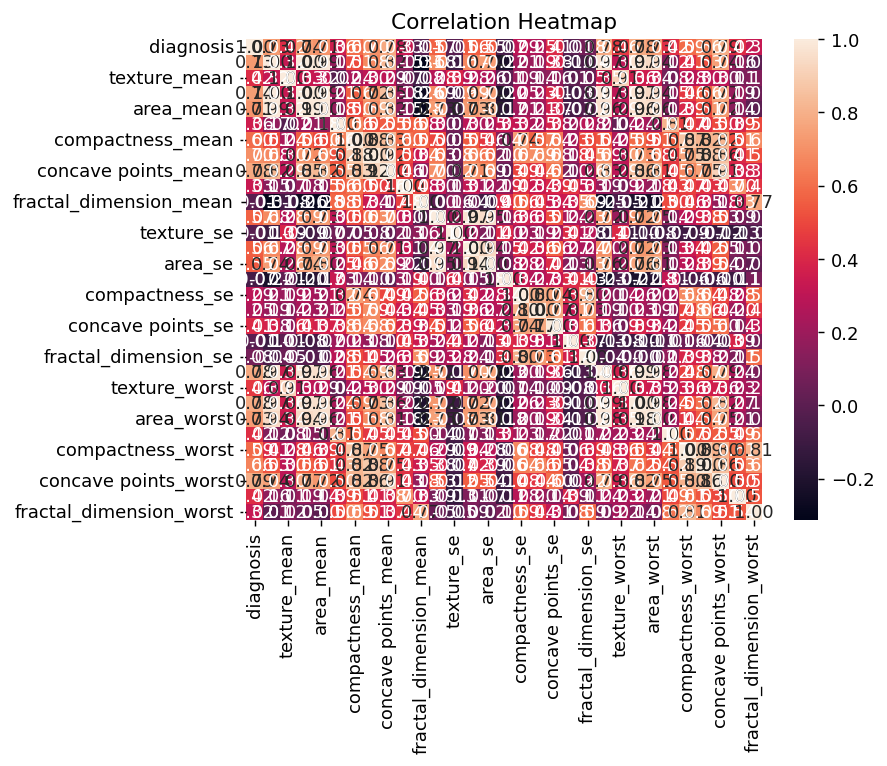

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True,
fmt= '.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.4,
random_state=0)

In [ ]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

[[1.120e+01 2.937e+01 7.067e+01 ... 0.000e+00 1.566e-01 5.905e-02]
 [1.981e+01 2.215e+01 1.300e+02 ... 2.388e-01 2.768e-01 7.615e-02]
 [1.630e+01 1.570e+01 1.047e+02 ... 1.357e-01 2.300e-01 7.230e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]
[[1.340e+01 2.052e+01 8.864e+01 ... 2.051e-01 3.585e-01 1.109e-01]
 [1.321e+01 2.525e+01 8.410e+01 ... 6.005e-02 2.444e-01 6.788e-02]
 [1.402e+01 1.566e+01 8.959e+01 ... 8.216e-02 2.136e-01 6.710e-02]
 ...
 [1.206e+01 1.274e+01 7.684e+01 ... 7.025e-02 2.514e-01 7.898e-02]
 [1.189e+01 2.117e+01 7.639e+01 ... 8.263e-02 3.075e-01 7.351e-02]
 [1.613e+01 1.788e+01 1.070e+02 ... 1.864e-01 4.270e-01 1.233e-01]]
[0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[0.17184975 0.81576763 0.16182956 ... 0.         0.         0.02521505]
 [0.59351584 0.51618257 0.58386684 ... 0.82259731 0.23698738 0.13750082]
 [0.42161712 0.24854772 0.40389814 ... 0.46744747 0.14471609 0.11222011]
 ...
 [0.08545962 0.35726141 0.08464931 ... 0.17402687 0.17507886 0.17171187]
 [0.09936824 0.35311203 0.09112249 ... 0.         0.06762618 0.06815943]
 [0.18703169 0.59004149 0.1892161  ... 0.33251808 0.10764984 0.21084772]]
[[0.27959254 0.44854772 0.28965713 ... 0.70651051 0.39806782 0.36568389]
 [0.27028748 0.64481328 0.25736236 ... 0.20685498 0.17310726 0.08319653]
 [0.30995641 0.24688797 0.29641485 ... 0.28301757 0.1123817  0.07807473]
 ...
 [0.21396738 0.12572614 0.20571916 ... 0.24199104 0.18690852 0.15608379]
 [0.2056418  0.47551867 0.20251814 ... 0.28463658 0.29751577 0.12016547]
 [0.41329154 0.33900415 0.42025893 ... 0.64209439 0.53312303 0.44710749]]


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_lgr_train_pred = lgr.predict(x_train)
y_lgr_test_pred = lgr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lgr_train_mse = mean_squared_error(y_train, y_lgr_train_pred)
lgr_train_r2 = r2_score(y_train, y_lgr_train_pred)

lgr_test_mse = mean_squared_error(y_test, y_lgr_test_pred)
lgr_test_r2 = r2_score(y_test, y_lgr_test_pred)

In [ ]:
print('LGR MSE (Train): ',lgr_train_mse)
print('LGR R2 (Train): ',lgr_train_r2)
print('LGR MSE (Test): ',lgr_test_mse)
print('LGR R2 (Test): ',lgr_test_r2)

LGR MSE (Train):  0.03519061583577713
LGR R2 (Train):  0.8503729706011408
LGR MSE (Test):  0.05701754385964912
LGR R2 (Test):  0.7537183215621105


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_lgr_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_lgr_test_pred, average='weighted')
recall = recall_score(y_test,  y_lgr_test_pred, average='weighted')
precision = precision_score(y_test,  y_lgr_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9429824561403509
F1-score: 0.9420011017792043
Recall: 0.9429824561403509
Precision: 0.9460235792472634


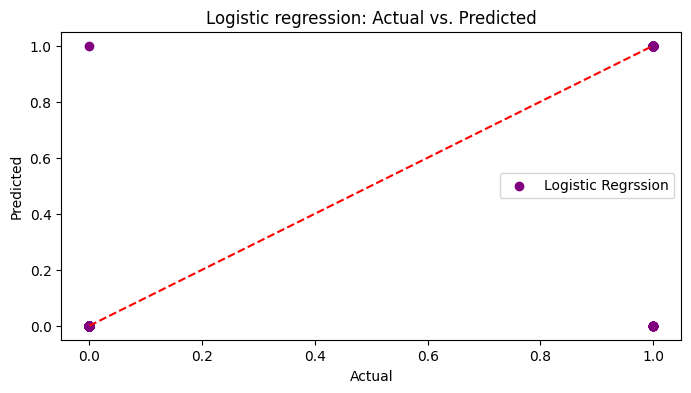

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_lgr_test_pred, color='purple', label='Logistic Regrssion')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Logistic regression: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
import numpy as np
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)
y_rf_test_pred = np.round(y_rf_test_pred)

In [ ]:
print(y_rf_test_pred)

[1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 1]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_rf_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_rf_test_pred, average='weighted')
recall = recall_score(y_test,  y_rf_test_pred, average='weighted')
precision = precision_score(y_test,  y_rf_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9385964912280702
F1-score: 0.9378661801900895
Recall: 0.9385964912280702
Precision: 0.9397156289416351


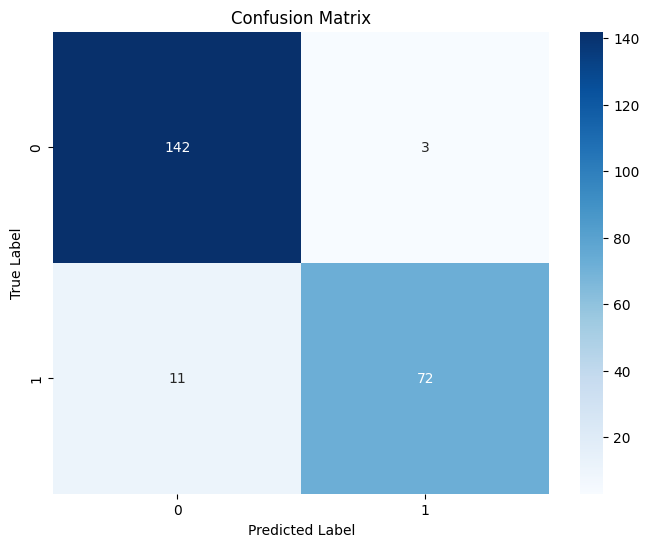

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_rf_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier( n_estimators=100, learning_rate=0.1, max_depth=5, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [19:24:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_xgb_train_pred = xgb.predict(x_train)
y_xgb_test_pred = xgb.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score

accuracy = accuracy_score(y_test, y_xgb_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_xgb_test_pred, average='weighted')
recall = recall_score(y_test,  y_xgb_test_pred, average='weighted')
precision = precision_score(y_test,  y_xgb_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9473684210526315
F1-score: 0.9470766864250573
Recall: 0.9473684210526315
Precision: 0.9474220765574628


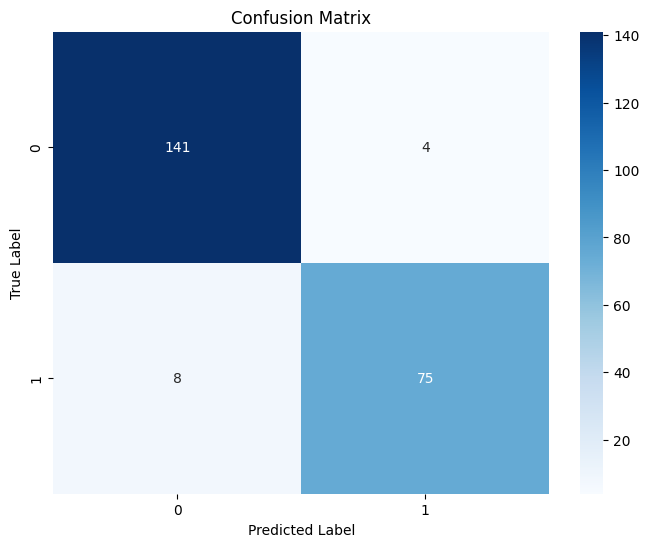

In [ ]:
cm = confusion_matrix(y_test, y_xgb_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb.classes_, yticklabels=xgb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_dtc_train_pred = dtc.predict(x_train)
y_dtc_test_pred = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_dtc_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_dtc_test_pred, average='weighted')
recall = recall_score(y_test,  y_dtc_test_pred, average='weighted')
precision = precision_score(y_test,  y_dtc_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.8903508771929824
F1-score: 0.8899031798176735
Recall: 0.8903508771929824
Precision: 0.8897863323850166


In [ ]:
import seaborn as sns

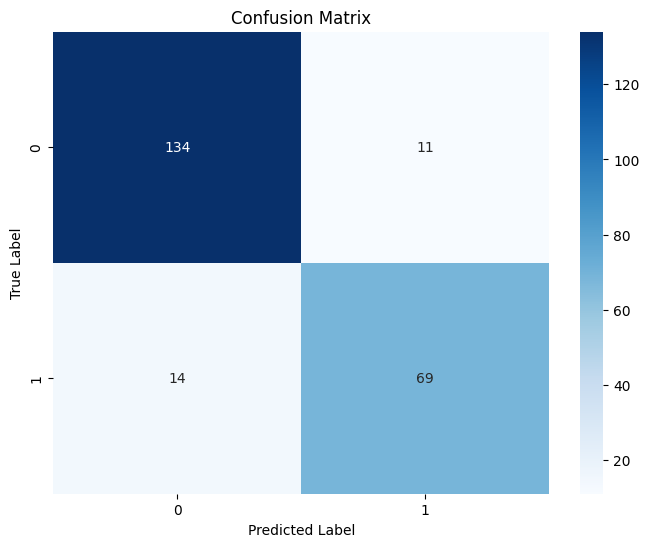

In [ ]:
cm = confusion_matrix(y_test, y_dtc_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFIER

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_svc_train_pred = svc.predict(x_train)
y_svc_test_pred = svc.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_svc_test_pred)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_svc_test_pred, average='weighted')
recall = recall_score(y_test,  y_svc_test_pred, average='weighted')
precision = precision_score(y_test,  y_svc_test_pred, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9736842105263158
F1-score: 0.9735383432125286
Recall: 0.9736842105263158
Precision: 0.9740508564759959


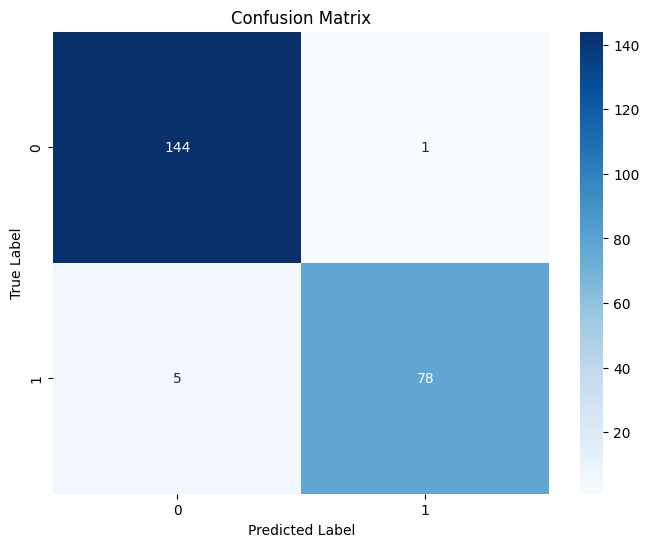

In [ ]:
cm = confusion_matrix(y_test, y_svc_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# LIGHT GBM CLASSIFIER

In [ ]:
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.classes_ = np.array([0, 1])
num_classes = len(le.classes_)
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    verbose=-1,
)

In [ ]:
lgbm_model.fit(x_train, y_train)

LGBMClassifier(objective='binary', random_state=42, verbose=-1)

In [ ]:
y_pred_lgbm = lgbm_model.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy}")
f1 = f1_score(y_test, y_pred_lgbm, average='weighted')
recall = recall_score(y_test,  y_pred_lgbm, average='weighted')
precision = precision_score(y_test,  y_pred_lgbm, average='weighted')

print(f"F1-score: {f1}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

Accuracy: 0.9824561403508771
F1-score: 0.9823588954750192
Recall: 0.9824561403508771
Precision: 0.9829271164488403
